<a href="https://colab.research.google.com/github/aniruddhamodak/Python-Notes-For-Data-Science/blob/master/13_Seaborn_Categorical_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [0]:
import seaborn as sns
%matplotlib inline

In [0]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

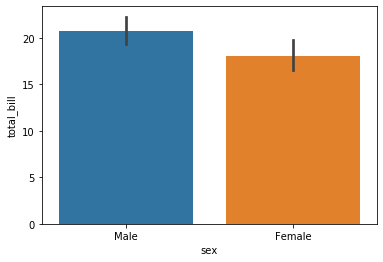

In [0]:
# [5]
sns.barplot(x='sex',y='total_bill',data=tips)

In [0]:
import numpy as np

You can change the estimator object to your own function, that converts a vector to a scalar:

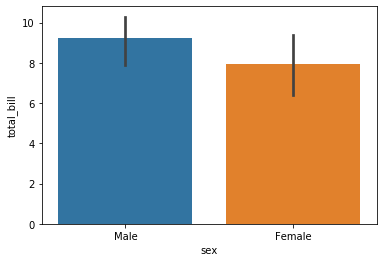

In [0]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)
# estimator is the function to be applied

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

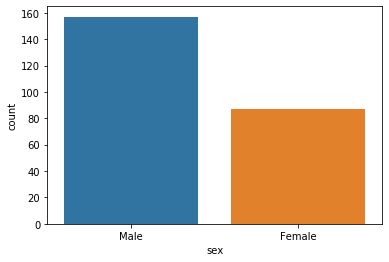

In [0]:
# [11]
sns.countplot(x='sex',data=tips)

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

In [0]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


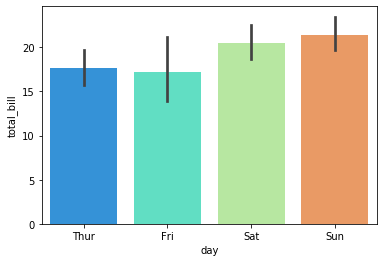

In [0]:
# [13]
sns.barplot(x='day',y='total_bill',data=tips,palette='rainbow')

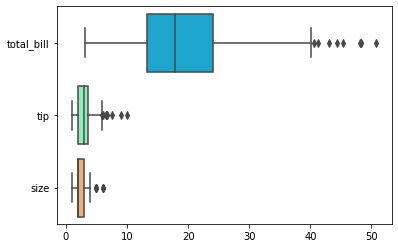

In [0]:
# [15]
sns.boxplot(data=tips,palette='rainbow',orient='h')

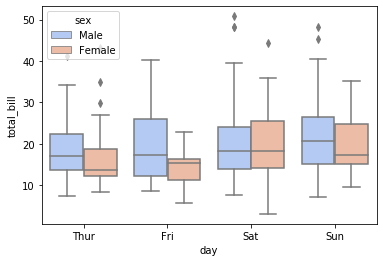

In [0]:
sns.boxplot(x="day", y="total_bill", hue="sex",data=tips, palette="coolwarm")

Observation:
People on Friday tend to have a larger bill if they are not a Smoker verses if they are a Smoker.
And then you can begin to actually see the variation for the smokers or that distribution for Smokers and Non-Smokers.

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

So basically a Violin plots gives more information compared to a Box Plot.

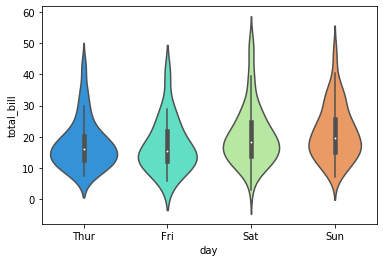

In [0]:
# [27]
sns.violinplot(x='day',y='total_bill',data=tips,palette='rainbow');

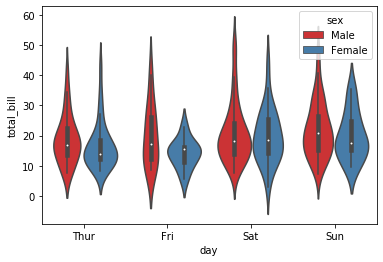

In [0]:
# [19]
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',palette='Set1');

Instead of putting two violin plots next to each other, since the
violin plot information is essentially doubled up, we can use split attribute.

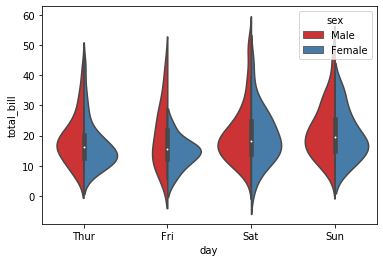

In [0]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

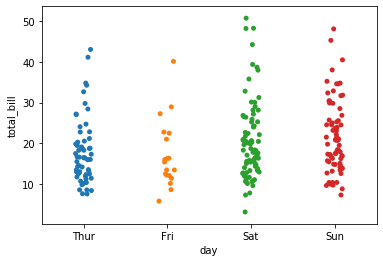

In [0]:
sns.stripplot(x="day", y="total_bill", data=tips)

One issue with this strip plot is that you cant really tell how many points are stacked on the top of each other, which you can do by adding another parameter "jitter".

What will jitter do?
It will randomly add a little bit of random noise to separate some of these stacked points.

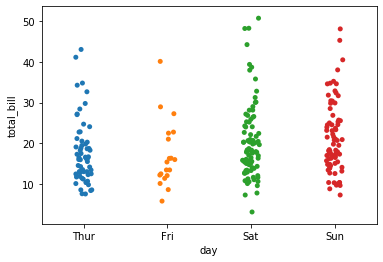

In [0]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

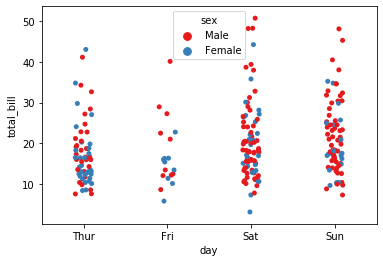

In [0]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

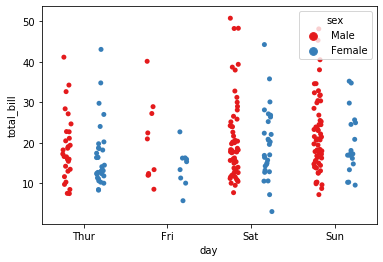

In [0]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True);

swarmplot = stripplot + violinplot

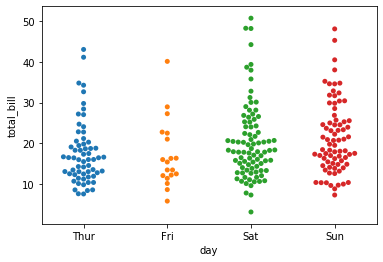

In [0]:
sns.swarmplot(x="day", y="total_bill", data=tips)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


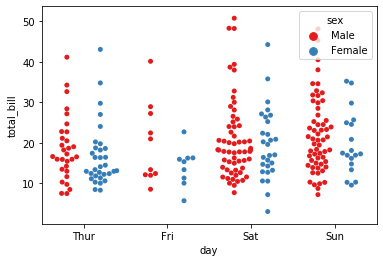

In [0]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

Avoid using swarmplot for very large datasets because these points just go way to wise and get stacked on top of each other.
Also most people probably might havent encountered swarmplots before.

### Combining Categorical Plots

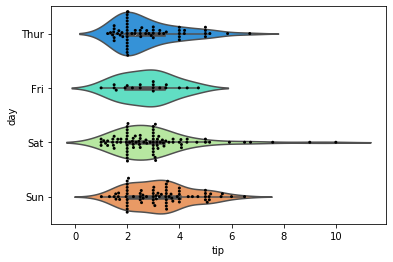

In [0]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)
#Use it only for EDA, and not for presentations to Clients or your manager

## factorplot

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


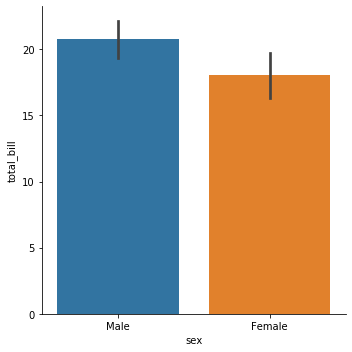

In [0]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')
# Try kind='violin'